In [1]:
import sys
# Assuming we are in the notebook directory add this so that we can import the library
sys.path.append('..')

import time

import numpy as np
import dask
import GPy
from abcpy.core import *
from abcpy.distributions import *
from abcpy.examples.ma2 import *
from abcpy.methods import *
from distributed import Client
from dask.dot import dot_graph
from functools import partial

import matplotlib
import matplotlib.pyplot as plt

#matplotlib.style.use('ggplot')
#%matplotlib inline


In [14]:
n = 1000
t1 = 0.6
t2 = 0.2

# Set up observed data y
latents = np.random.randn(n+2)
y = MA2(n, 1, t1, t2, latents=latents)

# Plot
if False:
    plt.figure(figsize=(11, 6))
    plt.plot(np.arange(0,n),y[0,:])
    plt.scatter(np.arange(-2,n), latents);

In [15]:
# Set up the simulator
simulator = partial(MA2, n)

# Set up autocovariance summaries
ac1 = partial(autocov, 1)
ac2 = partial(autocov, 2)

# Specify the graphical model
t1 = Prior('t1', 'uniform', 0, 1)
#t2 = Prior('t2', 'uniform', 0, 1)
Y = Simulator('MA2', simulator, t1, t2, observed=y)
S1 = Summary('S1', ac1, Y)
S2 = Summary('S2', ac2, Y)
d = Discrepancy('d', distance, S1, S2)

# Specify the number of simulations
n_sim = 10
n_batch = 2

In [16]:
bolfi = BOLFI(10, d, [t1], batch_size=n_batch, n_surrogate_samples=n_sim)
lik = bolfi.create_surrogate_likelihood()

/home/akangasr/abcpy/master_repo/abcpy/.venv/lib/python3.4/site-packages/distributed/deploy/local.py - INFO - To start diagnostics web server please install Bokeh
GP - INFO - initializing Y
GP - INFO - initializing inference method
GP - INFO - adding kernel and likelihood as parameters


Sampling 10 samples in batches of 2
Observed: [[ 0.5718517]] at [[ 11.68757689]]
Observed: [[ 0.62419663]] at [[ 66.92240018]]
Observed: [[ 0.18314558]] at [[ 184.31387967]]


 /home/akangasr/abcpy/master_repo/abcpy/.venv/lib/python3.4/site-packages/paramz/transformations.py:109: RuntimeWarning:overflow encountered in expm1


Observed: [[ 0.20853562]] at [[ 122.5633582]]
Observed: [[ 1.01061833]] at [[ 95.81953265]]
Observed: [[ 1.00041939]] at [[ 78.50772519]]
Observed: [[ 0.45672296]] at [[ 25.67296295]]
Observed: [[ 0.45847629]] at [[ 64.18820431]]
Observed: [[ 0.82157851]] at [[ 45.44633749]]
Observed: [[ 0.82465649]] at [[ 41.46580684]]


In [17]:
async_bolfi = BOLFI(10, d, [t1], sync=False, batch_size=n_batch, n_surrogate_samples=n_sim)
lik = async_bolfi.create_surrogate_likelihood()

/home/akangasr/abcpy/master_repo/abcpy/.venv/lib/python3.4/site-packages/distributed/deploy/local.py - INFO - To start diagnostics web server please install Bokeh
GP - INFO - initializing Y
GP - INFO - initializing inference method
GP - INFO - adding kernel and likelihood as parameters


Sampling 10 samples asynchronously 2 samples in parallel
Observed: [[ 1.23734822]] at [[ 172.11923991]]
Observed: [[ 0.90666496]] at [[ 66.50869858]]


 /home/akangasr/abcpy/master_repo/abcpy/.venv/lib/python3.4/site-packages/paramz/transformations.py:109: RuntimeWarning:overflow encountered in expm1


Observed: [[ 0.03673504]] at [[ 286.7976558]]
Observed: [[ 1.16074311]] at [[ 132.59664393]]
Observed: [[ 0.06812842]] at [[ 248.80349533]]
Observed: [[ 1.17595855]] at [[ 122.53336726]]
Observed: [[ 0.01378309]] at [[ 355.03769838]]
Observed: [[ 1.07739011]] at [[ 118.53565151]]


 /home/akangasr/abcpy/master_repo/abcpy/.venv/lib/python3.4/site-packages/GPy/kern/src/stationary.py:160: RuntimeWarning:overflow encountered in true_divide
 /home/akangasr/abcpy/master_repo/abcpy/.venv/lib/python3.4/site-packages/GPy/kern/src/stationary.py:198: RuntimeWarning:invalid value encountered in multiply


Observed: [[ 1.06139647]] at [[ 95.52407513]]
Observed: [[ 0.66183326]] at [[ 57.02538127]]


In [18]:
from IPython.display import display
display(bolfi.model.gp)
display(async_bolfi.model.gp)

GP_regression.,value,constraints,priors
Exponential.variance,13223.5831169,+ve,
Exponential.lengthscale,0.135839605575,+ve,
Gaussian_noise.variance,5.56268464627e-309,+ve,


GP_regression.,value,constraints,priors
Exponential.variance,61743.2202471,+ve,
Exponential.lengthscale,2.67515490103,+ve,
Gaussian_noise.variance,5.56268464627e-309,+ve,


 /home/akangasr/abcpy/master_repo/abcpy/.venv/lib/python3.4/site-packages/matplotlib/figure.py:1742: UserWarning:This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.


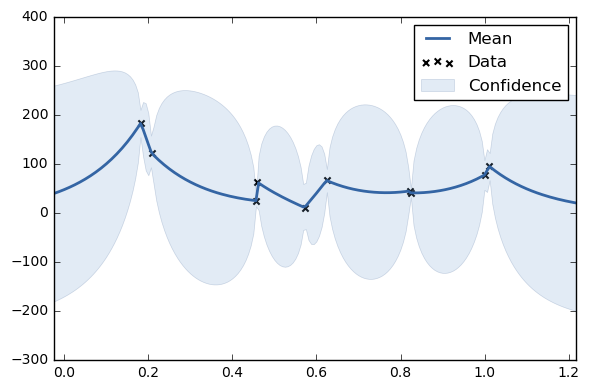

In [19]:
fig = bolfi.model.gp.plot()
GPy.plotting.show(fig)

 /home/akangasr/abcpy/master_repo/abcpy/.venv/lib/python3.4/site-packages/matplotlib/figure.py:1742: UserWarning:This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.


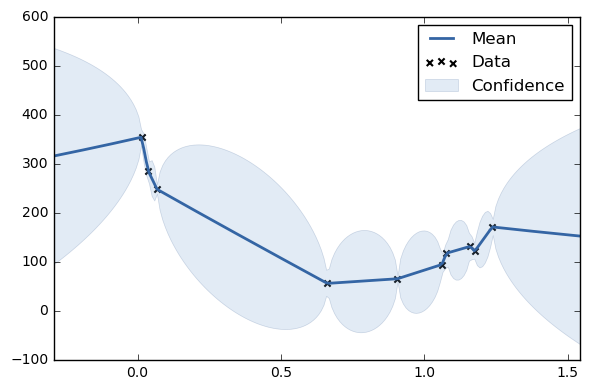

In [20]:
fig = async_bolfi.model.gp.plot()
GPy.plotting.show(fig)